Теперь познакомимся с новым алгоритмом классификации, а также снова потренируемся делить выборку и осуществлять кросс-валидацию. Кроме того, посмотрим, как можно оценить качество классификации для случая, когда наша классификация не бинарная, т.е. у нас несколько классов.

В этом кейсе мы попробуем определять типы стекла по его характеристикам.

Откроем данные и увидим, что в первых столбцах показатели содержания различных веществ в стекле, а в последнем (Type) — непосредственно тип стекла.

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("input/train_7_7_1.csv", low_memory = False)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Наша классификация мультиклассовая, поэтому мы должны посмотреть, сколько у нас классов. Если вы вообще ничего не знаете о задаче в плане количества классов, обязательно начинайте с этого, поскольку это повлияет на ход решения. Особенно важно понять, бинарная классификация или нет.

In [17]:
df.Type.nunique()

6

In [18]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Итак, мы выяснили, сколько у нас классов и узнали, что в этот раз у нас будет не бинарная классификация. А значит, мы не сможем использовать некоторые метрики качества (например, precision и recall).

Приступим непосредственно к построению модели. На примере этой задачи мы узнаем новый алгоритм kNN (метод ближайших соседей). Это один из простейших методов классификации. 

Его называют ленивым классификатором, потому что во время обучения модели он ничего не делает, просто считывает и сохраняет тренировочные данные. Сама классификация для него начинается тогда, когда ему дают тестовые данные. Тогда kNN проходит два базовых шага:

Сначала он ищет k ближайших размеченных точек данных – эти точки и называют k ближайшими соседями.<br />
Затем, используя классы соседей, kNN решает, как лучше классифицировать новые данные. 

Пример

Предположим, что алгоритм хочет классифицировать вас по профессии. Он видит, что люди, рядом с которыми вы находитесь (родители, друзья), — врачи. Тогда он решает, что вы — тоже скорее всего врач. Грубо говоря, он основывается на принципе, что подобное находится рядом с подобным.

А что делать, если ближайшие соседи не принадлежат одному классу? Можно решать по принципу большинства или дать каждому соседу вес (в зависимости от удаленности), с которым он будет вносить вклад в решение.

Например, попробуем классифицировать зеленый кружочек. На этом примере мы видим, что выбор числа соседей (это настраиваемый параметр) очень важен.

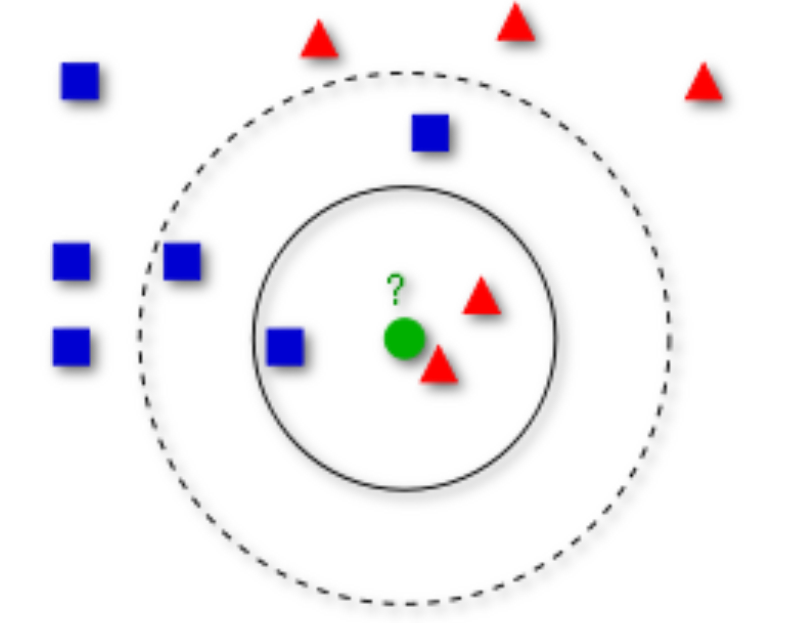

Если мы будем рассматривать трех соседей, то кружочек будет причислен к классу треугольников. А если пять соседей — к классу квадратов.

**Важно! Количество соседей должно быть нечетное во избежание спорной ситуации.**

Итак, мы разобрались с новым алгоритмом. Теперь воспользуемся k-fold валидацией на пяти разбиениях и обучим модель:

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10)

X = df.drop(columns='Type')
y = df.Type

cross_val_score(model, X, y, cv=kf, scoring="accuracy").mean()

0.5257575757575758

В следующей задаче мы будем диагностировать болезни сердца по различным медицинским параметрам пациентов.

In [54]:
df_heart = pd.read_csv("input/heart_fin_7_7_4.csv", encoding = 'cp1251', sep = ';', low_memory = False)
df_heart

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,02.мар,1
1,37,1,2,130,250,1,187,0,03.май,1
2,41,0,1,130,204,0,172,0,01.апр,1
3,56,1,1,120,236,1,178,0,0.8,1
4,57,0,0,120,354,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,0
299,45,1,3,110,264,1,132,0,01.фев,0
300,68,1,0,144,193,1,141,0,03.апр,0
301,57,1,0,130,131,1,115,1,01.фев,0


Избавьтесь от выбросов, чтобы они не ухудшили качество нашей модели. Для того, чтобы избавиться от выбросов, уберите все данные, значения признаков которых отстают от первого или третьего квартиля более, чем на 1.5 межквартильного размаха.

In [55]:
def convert_to_num(x):
    month_dict = {
        'янв': 1,
        'фев': 2,
        'мар': 3,
        'апр': 4,
        'май': 5,
        'июн': 6,
        'июл': 7,
        'авг': 8,
        'сен': 9,
        'окт': 10,
        'ноя': 11,
        'дек': 12,
    }
    if x.isdigit():
        return float(x)
    whole, remainder = x.split('.')
    if remainder.isdigit():
        return float(x)
    day, month = x.split('.')
    res = float(f"{day}.{month_dict[month]}")
    return res

df_heart.oldpeak = df_heart.oldpeak.apply(convert_to_num)

In [56]:
df_heart

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,2.3,1
1,37,1,2,130,250,1,187,0,3.5,1
2,41,0,1,130,204,0,172,0,1.4,1
3,56,1,1,120,236,1,178,0,0.8,1
4,57,0,0,120,354,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,0
299,45,1,3,110,264,1,132,0,1.2,0
300,68,1,0,144,193,1,141,0,3.4,0
301,57,1,0,130,131,1,115,1,1.2,0


In [38]:
# df_heart = df_heart.drop(['oldpeak'], axis=1)

KeyError: "['oldpeak'] not found in axis"

In [39]:
df_heart

,age,sex,cp,trestbps,chol,restecg,thalach,exang,target
0,61.0,1,2,140,233.0,0.0,150.0,0,1
1,47.5,1,2,130,250.0,1.0,166.0,0,1
2,47.5,0,1,130,211.0,0.0,166.0,0,1
3,56.0,1,1,120,236.0,1.0,166.0,0,1
4,57.0,0,0,120,274.5,1.0,163.0,1,1
...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241.0,1.0,133.5,1,0
299,47.5,1,2,120,264.0,1.0,133.5,0,0
300,61.0,1,0,140,211.0,1.0,141.0,0,0
301,57.0,1,0,130,211.0,1.0,133.5,1,0


In [58]:
# Delete outliers
def delete_outliers(data, feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    data = data.loc[data[feature].between(fence_low, fence_high)]
    return data
print(f"Shape before: {df_heart.shape}")

for col in df_heart.columns:
    df_heart = delete_outliers(df_heart, col)
print(f"Shape after: {df_heart.shape}")

Shape before: (303, 10)
Shape after: (284, 10)


In [59]:
df_heart

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,2.3,1
1,37,1,2,130,250,1,187,0,3.5,1
2,41,0,1,130,204,0,172,0,1.4,1
3,56,1,1,120,236,1,178,0,0.8,1
4,57,0,0,120,354,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,0
299,45,1,3,110,264,1,132,0,1.2,0
300,68,1,0,144,193,1,141,0,3.4,0
301,57,1,0,130,131,1,115,1,1.2,0


Теперь разбейте выборку на тестовую и обучающую с параметрами test_size=0.15, random_state=5.

Обучите модели логистической регрессии ( c параметром max_iter=1000) и KNN (с количеством соседей, равным 3) на этих данных. Вычислите метрики качества.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score

X = df_heart[list(set(df_heart.columns) - set(['target']))]
y = df_heart[['target']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

# logistic regression
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

# KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)

# ROC_AUC
auc_reg = np.round(roc_auc_score(y_test, y_pred_reg), 2)
print(f"auc_reg: {auc_reg}")
auc_knn = np.round(roc_auc_score(y_test, y_pred_knn), 2)
print(f"auc_knn: {auc_knn}")

auc_reg: 0.77
auc_knn: 0.62


C:\Users\vandr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vandr\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [2]:
import lightfm

ModuleNotFoundError: No module named 'lightfm'